# High order epistasis in malaria dhfr activity

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Epistasis imports
import json
from epistasis.models.linear import LocalEpistasisModel
from epistasis.models.regression import EpistasisRegression
from epistasis.plotting import epistasis_bar, bar_with_xbox
from seqspace.utils import DNA, AMINO_ACIDS

Load data from `.json` and `.txt` file.

In [3]:
PATH = "../datasets/costanzo.json"
f = open(PATH, "r")
data = json.load(f)
f.close()

Prepare the loaded data for epistasis model input (i.e. grab genotypes, phenotypes, etc.)

In [4]:
from seqspace.gpm import GenotypePhenotypeMap
#genotypes = data["genotype"]
wildtype = "000000"
#phenotypes = np.mean(data[["replicate 1", "replicate 2", "replicate 3"]], axis=1)
#errors = np.std(data[["replicate 1", "replicate 2", "replicate 3"]], axis=1)/np.sqrt(3) # 12 replicates

mutations = {
    0:["0","1"],
    1:["0","1"],
    2:["0","1"],
    3:["0","1","2"],
    4:["0","1"]
}

genotypes = np.array(data["genotypes"])
wildtype = genotypes[0]
phenotypes = np.array(data["phenotypes"])
errors = data["errors"]
space = GenotypePhenotypeMap(wildtype, genotypes, phenotypes, mutations=mutations)
genotypes = np.concatenate((genotypes,space.missing_genotypes))
phenotypes = np.concatenate((phenotypes, np.ones(len(space.missing_genotypes))*-14.0))
errors = np.concatenate((errors, np.zeros(len(space.missing_genotypes))))

In [5]:
model = LocalEpistasisModel(wildtype, genotypes, phenotypes, stdeviations=errors, log_transform=False, mutations=mutations)
model.fit()
model.fit_error()

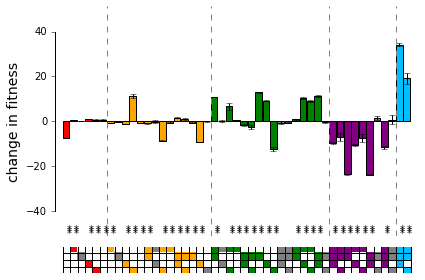

In [7]:
fig, ax = bar_with_xbox(model,y_axis_name="change in fitness",height_ratio=9,figsize=(6,4),star_spacer=0.01)
#fig.savefig("../../figures/costanzo_malarial_fitness_epistasis_pretty.svg", format="svg", dpi=300, bbox_inches='tight')